In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_stata(r"C:\Users\Oke\Downloads\SHESmodified.dta")
df.head()

,EndSmoke,Ethnic09,FEV2,FEV3,FEV4,FEV5,HEmploye,HHSize,Height,NatTeeth,...,hip1,hrtotg10,limitill,maritalg,pserialA,waist1,docstro,glyhb,totunitalk,intclaud
0,NaN,White: Scottish,NaN,NaN,NaN,NaN,Employee,4,174.6,20 or more natural teeth,...,NaN,Less than 1 hour,Non limiting LI,Married/civil partnership,10104101,NaN,Item not applicable,Item not applicable,26.066,Schedule not applicable
1,22.0,White: Scottish,NaN,NaN,NaN,NaN,Employee,4,168.4,20 or more natural teeth,...,NaN,7 hours or more,No LI,Married/civil partnership,10104102,NaN,Item not applicable,Item not applicable,16.154,Schedule not applicable
2,NaN,White: Scottish,2.82,2.73,2.78,2.68,Employee,2,157.0,20 or more natural teeth,...,104.5,Less than 1 hour,No LI,Living as married,10107101,85.1,Item not applicable,5.4,21.288,No
3,NaN,White: Northern Irish,NaN,NaN,NaN,NaN,Self-employed,4,162.6,20 or more natural teeth,...,NaN,7 hours or more,No LI,Married/civil partnership,10109101,NaN,Item not applicable,Item not applicable,4.702,Schedule not applicable
4,NaN,White: Scottish,NaN,NaN,NaN,NaN,Self-employed,4,179.7,20 or more natural teeth,...,NaN,7 hours or more,No LI,Married/civil partnership,10109102,NaN,Item not applicable,Item not applicable,9.86075,Schedule not applicable


In [3]:
df.columns

Index(['EndSmoke', 'Ethnic09', 'FEV2', 'FEV3', 'FEV4', 'FEV5', 'HEmploye',
       'HHSize', 'Height', 'NatTeeth', 'NumMeds', 'OwnRnt08', 'SAMPLETYPE',
       'SIMD5_SG', 'Sex', 'SmokYrs', 'Weight', 'age', 'alcbase', 'angidef',
       'bmi', 'bp1', 'cholest', 'cigst3', 'compm3', 'compm12', 'condcnt4',
       'copddef', 'crp', 'dias1om', 'dias2om', 'dias3om', 'fibgen', 'genhelf2',
       'ghq12scr', 'hedqul08', 'hip1', 'hrtotg10', 'limitill', 'maritalg',
       'pserialA', 'waist1', 'docstro', 'glyhb', 'totunitalk', 'intclaud'],
      dtype='object')

In [4]:
df['glyhb'].unique()

['Item not applicable', 5.4, 5.5, 5.3, 5.2, ..., 7.8, 8.7, 10.2, 6.7, 8.1]
Length: 45
Categories (45, object): ['Item not applicable' < 4.1 < 4.5 < 4.7 ... 9.4 < 10.2 < 10.3 < 12.3]

In [5]:
df1 = df.copy()
df1 = df1.drop(columns=['EndSmoke', 'Ethnic09', 'FEV2', 'FEV3', 'FEV4', 'FEV5', 'HEmploye',
       'HHSize', 'Height', 'NatTeeth', 'NumMeds', 'OwnRnt08', 'SAMPLETYPE',
       'SIMD5_SG', 'SmokYrs', 'Weight', 'age', 'alcbase', 'angidef',
       'bp1', 'cholest', 'cigst3', 'compm3', 'compm12', 'condcnt4',
       'copddef', 'crp', 'dias1om', 'dias2om', 'dias3om', 'fibgen', 'genhelf2',
       'ghq12scr', 'hedqul08', 'hip1', 'hrtotg10', 'limitill', 'maritalg',
       'pserialA', 'waist1', 'docstro', 'totunitalk', 'intclaud'])

df1.head()

,Sex,bmi,glyhb
0,Male,30.998689,Item not applicable
1,Female,24.154964,Item not applicable
2,Female,27.181630,5.4
3,Female,26.324986,Item not applicable
4,Male,25.981595,Item not applicable


In [6]:
df1.describe()

,Sex,bmi,glyhb
count,9038,7313.000000,9038
unique,2,7173.000000,45
top,Female,19.934417,Item not applicable
freq,4962,2.000000,8259


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9038 entries, 0 to 9037
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Sex     9038 non-null   category
 1   bmi     7313 non-null   category
 2   glyhb   9038 non-null   category
dtypes: category(3)
memory usage: 351.0 KB


There are 1,725 missing values for BMI. These records are dropped.

In [8]:
# Drop rows with missing BMI values
df1 = df1.dropna(subset=['bmi'])

# Convert Sex to string and bmi to float64
df1['Sex'] = df1['Sex'].astype(str)
df1['bmi'] = df1['bmi'].astype('float64')

# Verify the changes
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7313 entries, 0 to 9037
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Sex     7313 non-null   object  
 1   bmi     7313 non-null   float64 
 2   glyhb   7313 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 179.9+ KB


# Question 1

Is there any evidence of a difference in glycated haemoglobin (glyhb) level between males and females?

Unique values in Sex:
['Male' 'Female']

Unique values in glyhb:
['Item not applicable', 5.4, 5.5, 5.3, 5.2, ..., 8.0, 7.8, 10.2, 6.7, 8.1]
Length: 44
Categories (45, object): ['Item not applicable' < 4.1 < 4.5 < 4.7 ... 9.4 < 10.2 < 10.3 < 12.3]

Missing values in glyhb after conversion: 6593

Sex value counts:
Sex
Female    3950
Male      3363
Name: count, dtype: int64

Male samples: 324
Female samples: 396

DESCRIPTIVE STATISTICS
        count      mean  median       std  min   max
Sex                                                 
Female    396  5.644949     5.6  0.638788  4.1  10.3
Male      324  5.712037     5.6  0.663192  4.7  12.3

NORMALITY TESTS (Shapiro-Wilk)
Males: statistic=0.6981, p-value=0.0000
Females: statistic=0.7226, p-value=0.0000

INDEPENDENT SAMPLES T-TEST
t-statistic: 1.3780
p-value: 0.1686
Significant at α=0.05: No

MANN-WHITNEY U TEST (Non-parametric)
U-statistic: 68497.5000
p-value: 0.1165
Significant at α=0.05: No



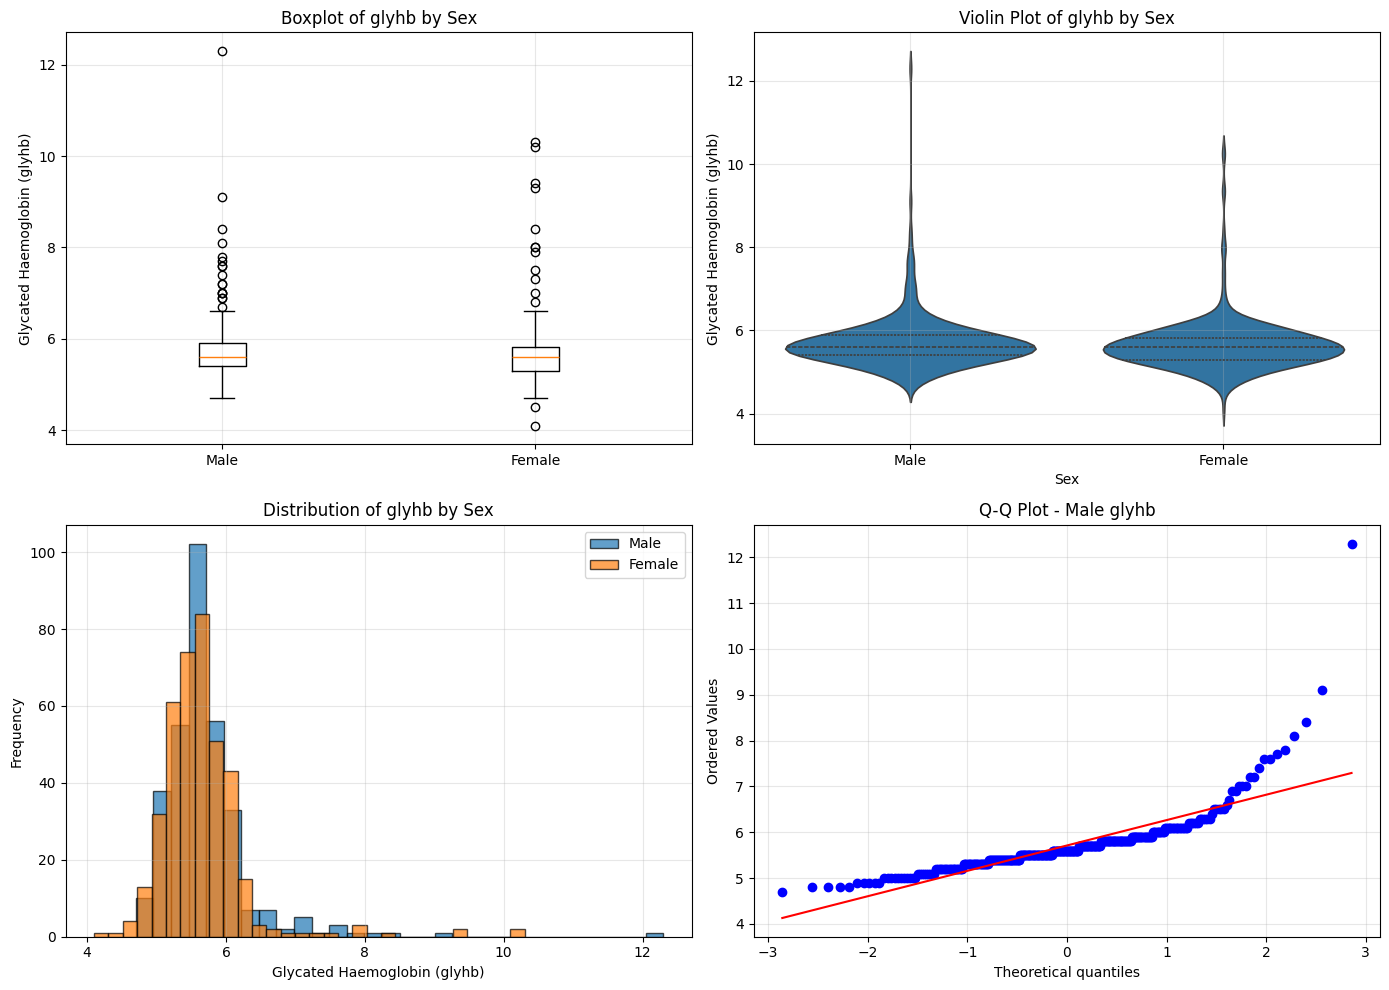

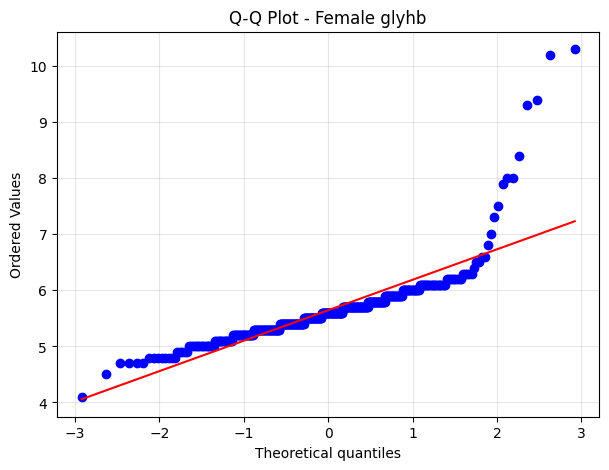

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Check unique values in Sex column
print("Unique values in Sex:")
print(df1['Sex'].unique())
print()

# Check unique values in glyhb
print("Unique values in glyhb:")
print(df1['glyhb'].unique())
print()

# Convert glyhb to numeric, treating 'Item not applicable' as NaN
df1['glyhb'] = pd.to_numeric(df1['glyhb'], errors='coerce')

# Check for missing values after conversion
print(f"Missing values in glyhb after conversion: {df1['glyhb'].isna().sum()}")
print()

# Check Sex value distribution
print("Sex value counts:")
print(df1['Sex'].value_counts())
print()

# Separate data by sex (use the actual values from your data)
male_glyhb = df1[df1['Sex'] == 'Male']['glyhb'].dropna()
female_glyhb = df1[df1['Sex'] == 'Female']['glyhb'].dropna()

# If still empty, try without quotes
if len(male_glyhb) == 0:
    male_glyhb = df1[df1['Sex'] == 'male']['glyhb'].dropna()
if len(female_glyhb) == 0:
    female_glyhb = df1[df1['Sex'] == 'female']['glyhb'].dropna()

# Check if we have data
print(f"Male samples: {len(male_glyhb)}")
print(f"Female samples: {len(female_glyhb)}")
print()

# Descriptive statistics
print("=" * 60)
print("DESCRIPTIVE STATISTICS")
print("=" * 60)
desc_stats = df1.groupby('Sex')['glyhb'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print(desc_stats)
print()

# Test for normality (Shapiro-Wilk test)
print("=" * 60)
print("NORMALITY TESTS (Shapiro-Wilk)")
print("=" * 60)
stat_male, p_male = stats.shapiro(male_glyhb)
stat_female, p_female = stats.shapiro(female_glyhb)
print(f"Males: statistic={stat_male:.4f}, p-value={p_male:.4f}")
print(f"Females: statistic={stat_female:.4f}, p-value={p_female:.4f}")
print()

# Independent samples t-test
print("=" * 60)
print("INDEPENDENT SAMPLES T-TEST")
print("=" * 60)
t_stat, t_pval = stats.ttest_ind(male_glyhb, female_glyhb)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {t_pval:.4f}")
print(f"Significant at α=0.05: {'Yes' if t_pval < 0.05 else 'No'}")
print()

# Mann-Whitney U test (non-parametric)
print("=" * 60)
print("MANN-WHITNEY U TEST (Non-parametric)")
print("=" * 60)
u_stat, u_pval = stats.mannwhitneyu(male_glyhb, female_glyhb, alternative='two-sided')
print(f"U-statistic: {u_stat:.4f}")
print(f"p-value: {u_pval:.4f}")
print(f"Significant at α=0.05: {'Yes' if u_pval < 0.05 else 'No'}")
print()

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Boxplot
axes[0, 0].boxplot([male_glyhb.values, female_glyhb.values], tick_labels=['Male', 'Female'])
axes[0, 0].set_ylabel('Glycated Haemoglobin (glyhb)')
axes[0, 0].set_title('Boxplot of glyhb by Sex')
axes[0, 0].grid(True, alpha=0.3)

# Violin plot using seaborn
plot_df = pd.DataFrame({
    'glyhb': pd.concat([male_glyhb, female_glyhb]),
    'Sex': ['Male']*len(male_glyhb) + ['Female']*len(female_glyhb)
})
sns.violinplot(data=plot_df, x='Sex', y='glyhb', ax=axes[0, 1], inner='quartile')
axes[0, 1].set_ylabel('Glycated Haemoglobin (glyhb)')
axes[0, 1].set_title('Violin Plot of glyhb by Sex')
axes[0, 1].grid(True, alpha=0.3)

# Histograms
axes[1, 0].hist(male_glyhb, bins=30, alpha=0.7, label='Male', edgecolor='black')
axes[1, 0].hist(female_glyhb, bins=30, alpha=0.7, label='Female', edgecolor='black')
axes[1, 0].set_xlabel('Glycated Haemoglobin (glyhb)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of glyhb by Sex')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Q-Q plots
stats.probplot(male_glyhb, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot - Male glyhb')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Q-Q plot for females (separate figure)
fig2, ax2 = plt.subplots(figsize=(7, 5))
stats.probplot(female_glyhb, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot - Female glyhb')
ax2.grid(True, alpha=0.3)
plt.show()

There is NO statistically significant evidence of a difference in glycated haemoglobin levels between males and females at alpha = 0.05.

The Mann-Whitney U test confirms this as the p value is > 0.05.

# Question 2

Convert bmi into the 5 categories shown in the NHS website and label them appropriately. Is there any evidence that glycated haemoglobin (glyhb) varies with BMI category?

BMI Category Distribution:
bmi_category
Healthy weight    2256
Obese             1741
Overweight        2320
Severely obese     136
Underweight        860
Name: count, dtype: int64

Total samples with valid glyhb: 720

DESCRIPTIVE STATISTICS BY BMI CATEGORY
                count      mean  median       std  min   max
bmi_category                                                
Healthy weight    200  5.555000     5.5  0.576050  4.1   9.3
Obese             208  5.837981     5.7  0.798580  4.5  12.3
Overweight        296  5.612838     5.6  0.469010  4.7   8.4
Severely obese     13  6.400000     5.7  1.428286  5.2  10.2
Underweight         3  5.400000     5.4  0.100000  5.3   5.5

NORMALITY TESTS BY BMI CATEGORY (Shapiro-Wilk)
Overweight: n=296, statistic=0.8379, p-value=0.0000
Healthy weight: n=200, statistic=0.7634, p-value=0.0000
Obese: n=208, statistic=0.6672, p-value=0.0000
Severely obese: n=13, statistic=0.7661, p-value=0.0028
Underweight: n=3, statistic=1.0000, p-value=1.0000

KRUSK

C:\Users\Oke\AppData\Local\Temp\ipykernel_37488\1337207238.py:116: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=df_analysis, x='bmi_category', y='glyhb', ax=axes[1, 1],
C:\Users\Oke\AppData\Local\Temp\ipykernel_37488\1337207238.py:116: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  sns.pointplot(data=df_analysis, x='bmi_category', y='glyhb', ax=axes[1, 1],


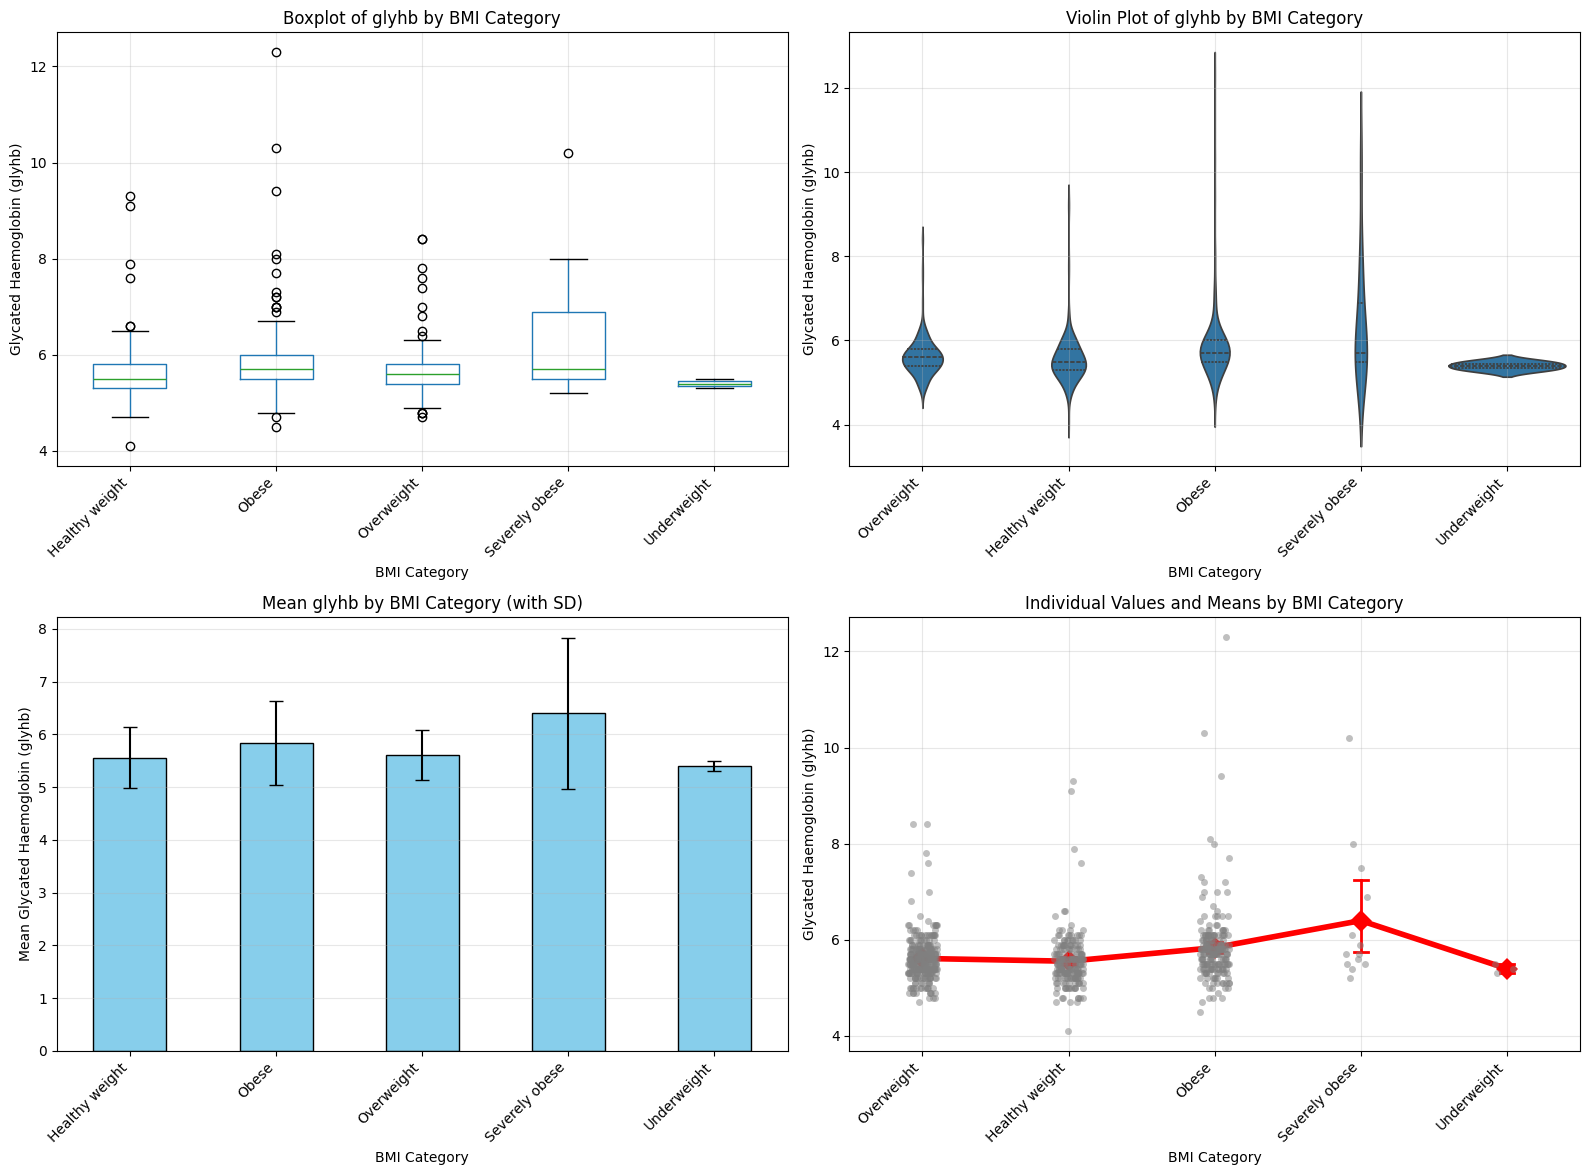

In [12]:
# Create BMI categories based on NHS classification
def categorize_bmi(bmi):
    if pd.isna(bmi):
        return None
    elif bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Healthy weight'
    elif bmi < 30:
        return 'Overweight'
    elif bmi < 40:
        return 'Obese'
    else:
        return 'Severely obese'

# Apply categorization
df1['bmi_category'] = df1['bmi'].apply(categorize_bmi)

# Check distribution
print("BMI Category Distribution:")
print(df1['bmi_category'].value_counts().sort_index())
print()

# Filter out rows with missing glyhb
df_analysis = df1[df1['glyhb'].notna()].copy()

print(f"Total samples with valid glyhb: {len(df_analysis)}")
print()

# Descriptive statistics by BMI category
print("=" * 70)
print("DESCRIPTIVE STATISTICS BY BMI CATEGORY")
print("=" * 70)
desc_stats = df_analysis.groupby('bmi_category')['glyhb'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
])
print(desc_stats)
print()

# Test for normality in each group (Shapiro-Wilk)
print("=" * 70)
print("NORMALITY TESTS BY BMI CATEGORY (Shapiro-Wilk)")
print("=" * 70)
for category in df_analysis['bmi_category'].dropna().unique():
    group_data = df_analysis[df_analysis['bmi_category'] == category]['glyhb'].dropna()
    if len(group_data) >= 3:
        stat, p = stats.shapiro(group_data)
        print(f"{category}: n={len(group_data)}, statistic={stat:.4f}, p-value={p:.4f}")
print()

# Kruskal-Wallis H-test (non-parametric ANOVA)
print("=" * 70)
print("KRUSKAL-WALLIS H-TEST (Non-parametric)")
print("=" * 70)
groups = [df_analysis[df_analysis['bmi_category'] == cat]['glyhb'].dropna() 
          for cat in df_analysis['bmi_category'].dropna().unique()]
h_stat, h_pval = stats.kruskal(*groups)
print(f"H-statistic: {h_stat:.4f}")
print(f"p-value: {h_pval:.4f}")
print(f"Significant at α=0.05: {'Yes' if h_pval < 0.05 else 'No'}")
print()

# One-way ANOVA (parametric)
print("=" * 70)
print("ONE-WAY ANOVA (Parametric)")
print("=" * 70)
f_stat, f_pval = stats.f_oneway(*groups)
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {f_pval:.4f}")
print(f"Significant at α=0.05: {'Yes' if f_pval < 0.05 else 'No'}")
print()

# If significant, perform post-hoc pairwise comparisons (Dunn's test)
if h_pval < 0.05:
    from scikit_posthocs import posthoc_dunn
    print("=" * 70)
    print("POST-HOC PAIRWISE COMPARISONS (Dunn's Test)")
    print("=" * 70)
    dunn_results = posthoc_dunn(df_analysis, val_col='glyhb', group_col='bmi_category', p_adjust='bonferroni')
    print(dunn_results)
    print()

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Boxplot
df_analysis.boxplot(column='glyhb', by='bmi_category', ax=axes[0, 0])
axes[0, 0].set_xlabel('BMI Category')
axes[0, 0].set_ylabel('Glycated Haemoglobin (glyhb)')
axes[0, 0].set_title('Boxplot of glyhb by BMI Category')
axes[0, 0].get_figure().suptitle('')
plt.setp(axes[0, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
axes[0, 0].grid(True, alpha=0.3)

# Violin plot
sns.violinplot(data=df_analysis, x='bmi_category', y='glyhb', ax=axes[0, 1], inner='quartile')
axes[0, 1].set_xlabel('BMI Category')
axes[0, 1].set_ylabel('Glycated Haemoglobin (glyhb)')
axes[0, 1].set_title('Violin Plot of glyhb by BMI Category')
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
axes[0, 1].grid(True, alpha=0.3)

# Bar plot of means with error bars
means = df_analysis.groupby('bmi_category')['glyhb'].mean()
stds = df_analysis.groupby('bmi_category')['glyhb'].std()
means.plot(kind='bar', yerr=stds, ax=axes[1, 0], capsize=5, color='skyblue', edgecolor='black')
axes[1, 0].set_xlabel('BMI Category')
axes[1, 0].set_ylabel('Mean Glycated Haemoglobin (glyhb)')
axes[1, 0].set_title('Mean glyhb by BMI Category (with SD)')
plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Strip plot with means
sns.stripplot(data=df_analysis, x='bmi_category', y='glyhb', ax=axes[1, 1], 
              alpha=0.5, jitter=True, color='gray')
sns.pointplot(data=df_analysis, x='bmi_category', y='glyhb', ax=axes[1, 1], 
              color='red', markers='D', scale=1.5, errwidth=2, capsize=0.1)
axes[1, 1].set_xlabel('BMI Category')
axes[1, 1].set_ylabel('Glycated Haemoglobin (glyhb)')
axes[1, 1].set_title('Individual Values and Means by BMI Category')
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

There is strong statistical evidence that glycated haemoglobin varies with BMI category (p < 0.0001).
This is shown in the Kruskal-Wallis H-test and one-way ANOVA test.

From the descriptive statistics, there is a clear trend of increasing glycated haemoglobin with BMI category, suggesting higher glucose levels in higher BMI groups.
Higher BMI -> higher glyhb

Overweight, Healthy weight, Obese, and Severely obese all have non-normal distributions, justifying the use of non-parametric tests.

Limitation: Very small sample size for Underweight (n=3) and Severely obese (n=13) categories limit interpretation for these groups.

# Question 3

The cardiovascular literature suggests that BMI can be predicted from glucose. In your opinion, is there any evidence to support this suggestion in this data set?

Total samples with valid BMI and glyhb: 720

CORRELATION ANALYSIS
Pearson correlation coefficient: 0.2347

Spearman correlation coefficient: 0.2472
Spearman p-value: 0.0000
Significant at α=0.05: Yes

LINEAR REGRESSION: BMI ~ glyhb
Intercept (β0): 18.1367
Coefficient (β1): 1.7505
Equation: BMI = 18.1367 + 1.7505 × glyhb

R-squared (R²): 0.0551
Root Mean Squared Error (RMSE): 4.7112
Mean Absolute Error (MAE): 3.7024

F-statistic: 41.8585
p-value: 0.0000
Regression is significant at α=0.05: Yes



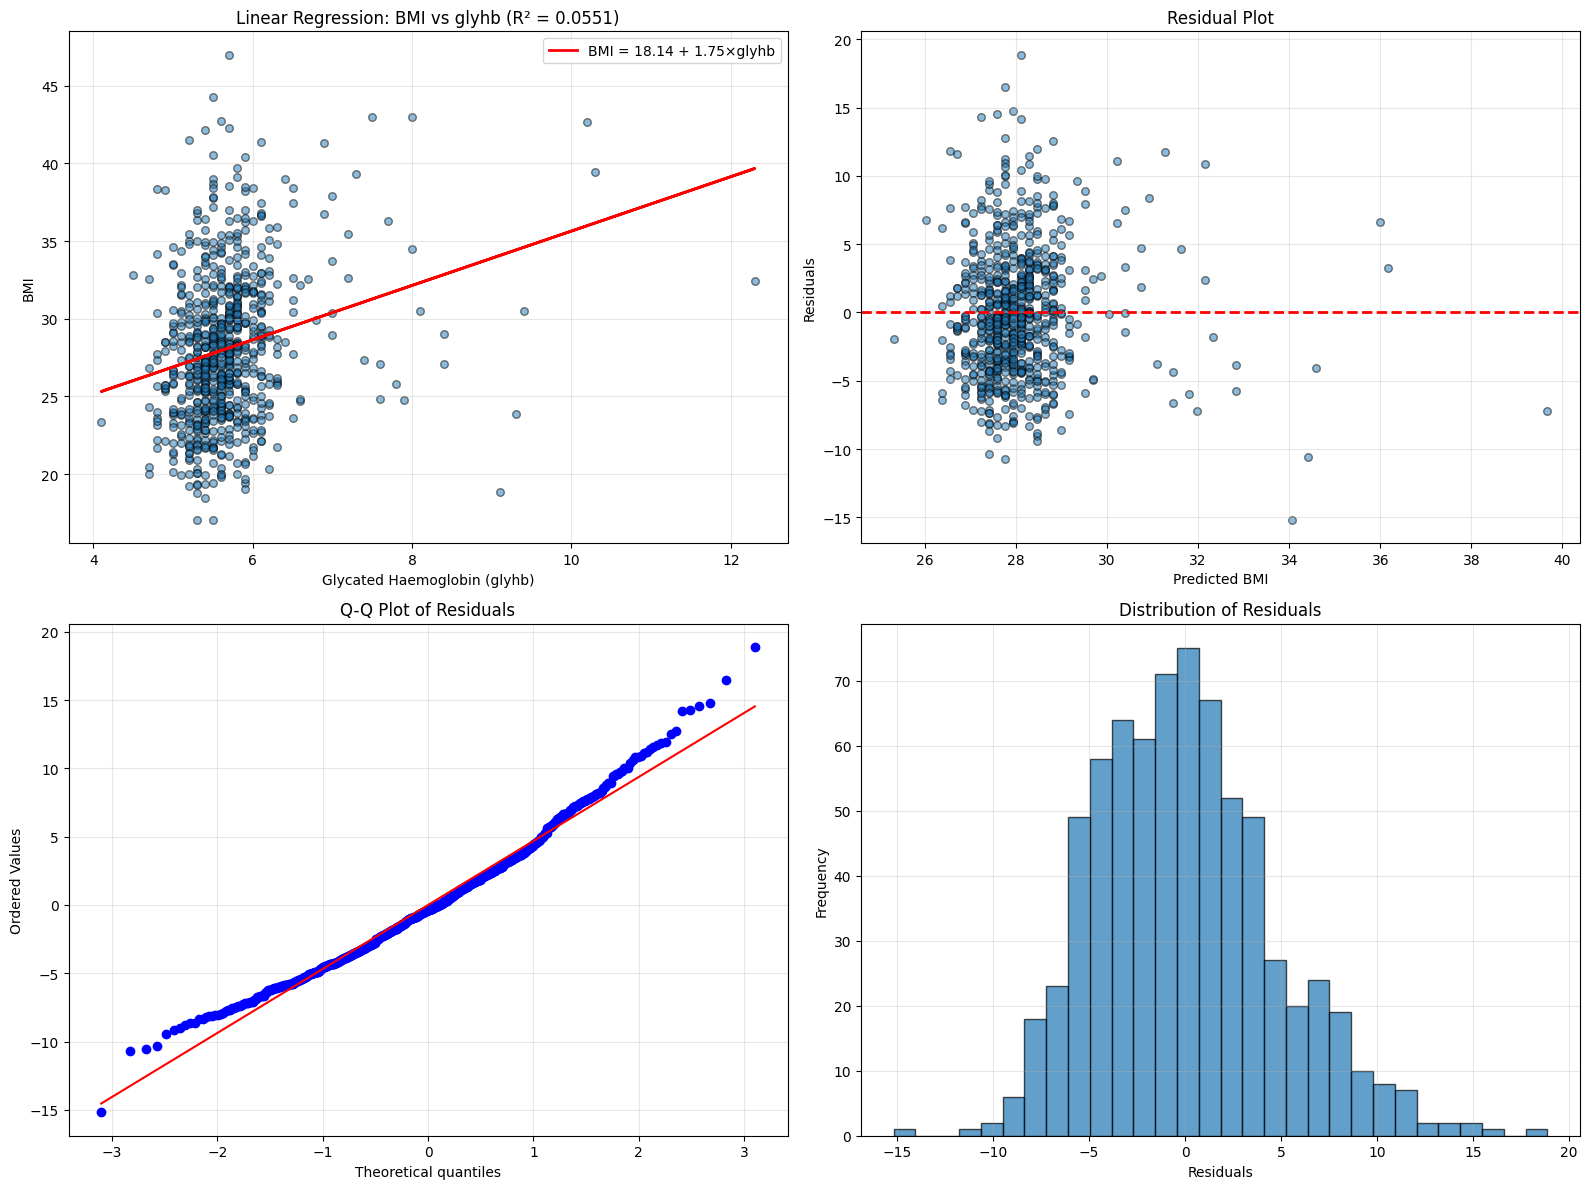

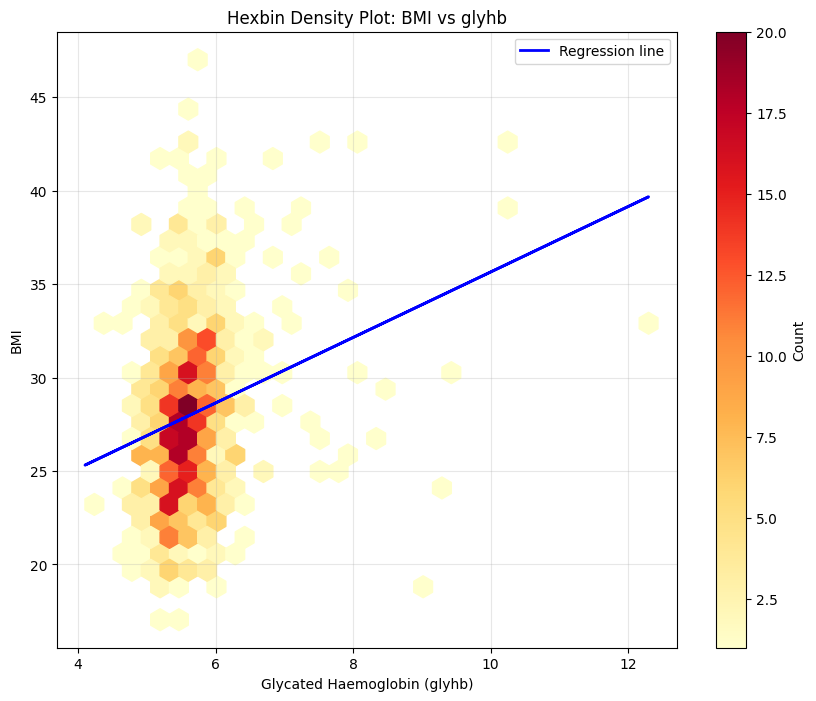

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Filter data with both BMI and glyhb values
df_regression = df1[df1['glyhb'].notna()].copy()

print(f"Total samples with valid BMI and glyhb: {len(df_regression)}")
print()

# Correlation analysis
print("=" * 70)
print("CORRELATION ANALYSIS")
print("=" * 70)
correlation = df_regression['bmi'].corr(df_regression['glyhb'])
print(f"Pearson correlation coefficient: {correlation:.4f}")
print()

# Spearman correlation (non-parametric)
spearman_corr, spearman_p = stats.spearmanr(df_regression['bmi'], df_regression['glyhb'])
print(f"Spearman correlation coefficient: {spearman_corr:.4f}")
print(f"Spearman p-value: {spearman_p:.4f}")
print(f"Significant at α=0.05: {'Yes' if spearman_p < 0.05 else 'No'}")
print()

# Linear regression: BMI = β0 + β1*glyhb
print("=" * 70)
print("LINEAR REGRESSION: BMI ~ glyhb")
print("=" * 70)

X = df_regression[['glyhb']]
y = df_regression['bmi']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(f"Intercept (β0): {model.intercept_:.4f}")
print(f"Coefficient (β1): {model.coef_[0]:.4f}")
print(f"Equation: BMI = {model.intercept_:.4f} + {model.coef_[0]:.4f} × glyhb")
print()

# Model performance
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)

print(f"R-squared (R²): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print()

# Statistical significance of regression
from scipy import stats as sp_stats
n = len(df_regression)
f_stat = (r2 / 1) / ((1 - r2) / (n - 2))
f_pval = 1 - sp_stats.f.cdf(f_stat, 1, n - 2)
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {f_pval:.4f}")
print(f"Regression is significant at α=0.05: {'Yes' if f_pval < 0.05 else 'No'}")
print()

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Scatter plot with regression line
axes[0, 0].scatter(df_regression['glyhb'], df_regression['bmi'], alpha=0.5, s=30, edgecolors='black')
axes[0, 0].plot(df_regression['glyhb'], y_pred, color='red', linewidth=2, label=f'BMI = {model.intercept_:.2f} + {model.coef_[0]:.2f}×glyhb')
axes[0, 0].set_xlabel('Glycated Haemoglobin (glyhb)')
axes[0, 0].set_ylabel('BMI')
axes[0, 0].set_title(f'Linear Regression: BMI vs glyhb (R² = {r2:.4f})')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Residual plot
residuals = y - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.5, s=30, edgecolors='black')
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted BMI')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot of residuals
sp_stats.probplot(residuals, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot of Residuals')
axes[1, 0].grid(True, alpha=0.3)

# Histogram of residuals
axes[1, 1].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Residuals')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional visualization: Hexbin plot for density
fig2, ax2 = plt.subplots(figsize=(10, 8))
hexbin = ax2.hexbin(df_regression['glyhb'], df_regression['bmi'], gridsize=30, cmap='YlOrRd', mincnt=1)
ax2.plot(df_regression['glyhb'], y_pred, color='blue', linewidth=2, label=f'Regression line')
ax2.set_xlabel('Glycated Haemoglobin (glyhb)')
ax2.set_ylabel('BMI')
ax2.set_title('Hexbin Density Plot: BMI vs glyhb')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.colorbar(hexbin, ax=ax2, label='Count')
plt.show()

Opinion: There is statistical evidence of an association between BMI and glucose levels. The Pearson correlation = 0.2347 and Spearman correlation = 0.2472 showing a slight positive correlation between glucose and BMI.
However, from the regression model, glyhb explains only 5.51% of BMI variation. Also, the RMSE and MAE values were 4.71 and 3.70 respectively, which are huge error values in BMI units. Therefore, glyhb alone is a poor predictor of BMI. Further investigation is required in identifying other factors which could explain the remaining 94.5% of BMI variability.